In [1]:
#Import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Input, ReLU, BatchNormalization
from tensorflow.keras.preprocessing.image import ImageDataGenerator


In [2]:
# 1. Load Data from CSV
train_df = pd.read_csv("/kaggle/input/digit-recognizer/train.csv")

In [3]:
# 2. Preprocess the Data
X = train_df.iloc[:, 1:].values  # Features (all columns except the first one)
y = train_df.iloc[:, 0].values   # Target (first column)

X = X.reshape(-1, 28, 28, 1)
X = X/255.0


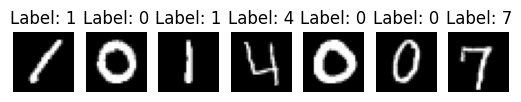

In [4]:
# 3. Plot the first 10 images from the training dataset
for i in range(7):
    plt.subplot(1, 7, i+1)  # Create a 1x5 grid of images
    plt.imshow(X[i], cmap='gray')  # Display the image, with 'gray' colormap for grayscale images
    plt.title(f"Label: {y[i]}")  # Display the label of the image
    plt.axis('off')  # Hide the axis
plt.show()  # Show the plot

In [5]:
# 4. Data Augmentation
datagen = ImageDataGenerator(
    rotation_range=40,      # Randomly rotate images by up to 40 degrees
    width_shift_range=0.2,  # Randomly shift images horizontally by 20%
    height_shift_range=0.2, # Randomly shift images vertically by 20%
    zoom_range=0.2,         # Randomly zoom in or out
    fill_mode='nearest' ,   # How to fill in new pixels after transformations
    validation_split=0.2 
)

datagen.fit(X)
# Apply augmentation to the training data and validation split
train_generator = datagen.flow(X, y, batch_size=32, subset='training')
val_generator = datagen.flow(X, y, batch_size=32, subset='validation')

In [6]:
# 5. Define the Convolutionary Neural Network Model
model = Sequential([
    Input(shape=(28, 28, 1)),

    Conv2D(32, (3, 3), padding='same'), # First Convolutional Layer
    ReLU(),  # Apply ReLU after Conv2D
    
    Conv2D(64, (3, 3), padding='same'), # Second Convolutional Layer
    ReLU(),  # Apply ReLU after Conv2D
     
    Conv2D(128, (5, 5), padding='same'), # Third Convolutional Layer
    ReLU(),  # Apply ReLU after Conv2D
    
    Conv2D(128, (7, 7), padding='same'), # Fourth Convolutional Layer
    BatchNormalization(), #Batch normalization
    ReLU(),  # Apply ReLU after Conv2D
    
    MaxPooling2D(pool_size=(2, 2)),  # Max pooling to reduce the spatial dimensions

    # Flatten the 3D outputs to 1D
    Flatten(),
    
    # Dense Layers
    Dense(256),                          # First dense layer
    BatchNormalization(),                # Batch Normalization after the first dense layer
    ReLU(),                              # Activation function after BatchNorm
    
    Dense(128),                          # Second dense layer (256 nodes added)
    ReLU(),                              # Activation function after Dense
    
    Dense(64),                           # Third dense layer
    ReLU(),                              # Activation function after Dense

    Dense(10, activation='softmax')      # Output layer (classification)
])


#6: Compile the model
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',  # For integer labels
              metrics=['accuracy'])


In [7]:
#7: Train the model
model.fit(train_generator, epochs=20, validation_data=val_generator)


Epoch 1/20


/usr/local/lib/python3.10/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


1050/1050 ━━━━━━━━━━━━━━━━━━━━ 45s 35ms/step - accuracy: 0.6908 - loss: 0.9298 - val_accuracy: 0.9411 - val_loss: 0.1807
Epoch 2/20
1050/1050 ━━━━━━━━━━━━━━━━━━━━ 36s 34ms/step - accuracy: 0.9393 - loss: 0.1951 - val_accuracy: 0.9601 - val_loss: 0.1304
Epoch 3/20
1050/1050 ━━━━━━━━━━━━━━━━━━━━ 37s 35ms/step - accuracy: 0.9561 - loss: 0.1368 - val_accuracy: 0.9711 - val_loss: 0.0959
Epoch 4/20
1050/1050 ━━━━━━━━━━━━━━━━━━━━ 39s 37ms/step - accuracy: 0.9619 - loss: 0.1229 - val_accuracy: 0.9677 - val_loss: 0.1111
Epoch 5/20
1050/1050 ━━━━━━━━━━━━━━━━━━━━ 40s 38ms/step - accuracy: 0.9655 - loss: 0.1097 - val_accuracy: 0.9683 - val_loss: 0.1039
Epoch 6/20
1050/1050 ━━━━━━━━━━━━━━━━━━━━ 40s 38ms/step - accuracy: 0.9708 - loss: 0.0973 - val_accuracy: 0.9598 - val_loss: 0.1287
Epoch 7/20
1050/1050 ━━━━━━━━━━━━━━━━━━━━ 40s 38ms/step - accuracy: 0.9711 - loss: 0.0936 - val_accuracy: 0.9780 - val_loss: 0.0688
Epoch 8/20
1050/1050 ━━━━━━━━━━━━━━━━━━━━ 40s 38ms/step - accuracy: 0.9727 - loss: 0.08

In [8]:
#8. Output the submission file
test_df= pd.read_csv("/kaggle/input/digit-recognizer/test.csv") #load the test data

test= test_df.to_numpy()
test= test.reshape(-1, 28 , 28,1)
test = test/255.0

predictions = model.predict(test)
predicted_labels = np.argmax(predictions, axis=1)

submissions= pd.DataFrame({'Imageid': range(1, 28001)})
submissions['Label']= predicted_labels
submissions.to_csv('submission.csv', index=None)

875/875 ━━━━━━━━━━━━━━━━━━━━ 9s 10ms/step
